**STEP 1: DATASET DOWNLOAD ✅**

**STEP 2: IMPORTS ✅**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


**STEP 3: LOADING THE DATASET ✅**

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**STEP 4: PREPROCESSING ✅**

In [ ]:
# Drop non-numeric or irrelevant columns
df = df.drop(['CustomerID', 'Gender'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


**STEP 5: PCA FOR VISUALIZATION ✅**

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


**STEP 6: OPTIMAL K USING ELBOW METHOD ✅**

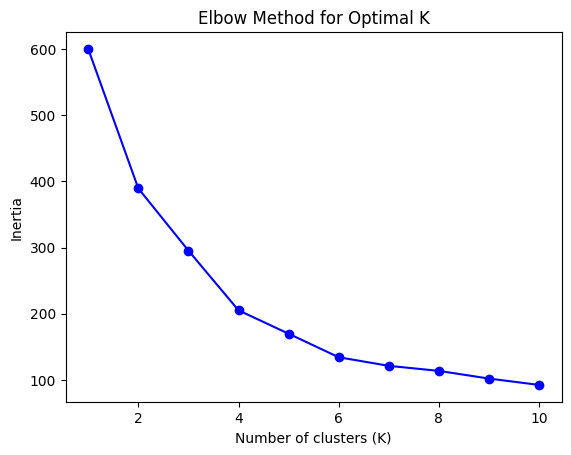

In [ ]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


**STEP 7: K-MEANS CLUSTERING ✅**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters


**STEP 8: VISUALIZATION ✅**

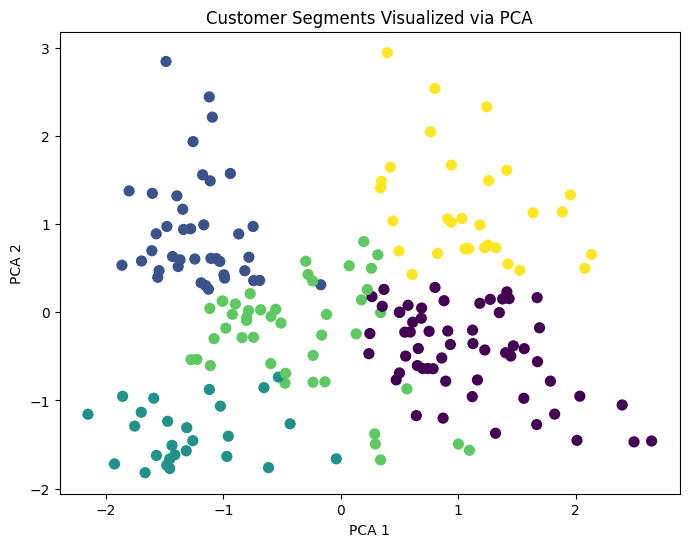

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segments Visualized via PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


**STEP 9: EVALUATION ✅**

In [ ]:
score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.40846873777345605
